In [3]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime


In [4]:
df = pd.read_csv("../data/01_input_history.csv")

In [5]:
df

,Country,Product,Month,Quantity
0,Japan,MorningMint,Jan2004,0
1,Japan,MorningMint,Feb2004,0
2,Japan,MorningMint,Mar2004,0
3,Japan,MorningMint,Apr2004,0
4,Japan,MorningMint,May2004,0
...,...,...,...,...
239995,Russia,HydratingHoney Pet Wipes,Aug2023,0
239996,Russia,HydratingHoney Pet Wipes,Sep2023,0
239997,Russia,HydratingHoney Pet Wipes,Oct2023,0
239998,Russia,HydratingHoney Pet Wipes,Nov2023,0


In [6]:
df['date'] = pd.to_datetime(df['Month'], format='%b%Y')

In [7]:
df

,Country,Product,Month,Quantity,date
0,Japan,MorningMint,Jan2004,0,2004-01-01
1,Japan,MorningMint,Feb2004,0,2004-02-01
2,Japan,MorningMint,Mar2004,0,2004-03-01
3,Japan,MorningMint,Apr2004,0,2004-04-01
4,Japan,MorningMint,May2004,0,2004-05-01
...,...,...,...,...,...
239995,Russia,HydratingHoney Pet Wipes,Aug2023,0,2023-08-01
239996,Russia,HydratingHoney Pet Wipes,Sep2023,0,2023-09-01
239997,Russia,HydratingHoney Pet Wipes,Oct2023,0,2023-10-01
239998,Russia,HydratingHoney Pet Wipes,Nov2023,0,2023-11-01


<Axes: xlabel='date', ylabel='Quantity'>

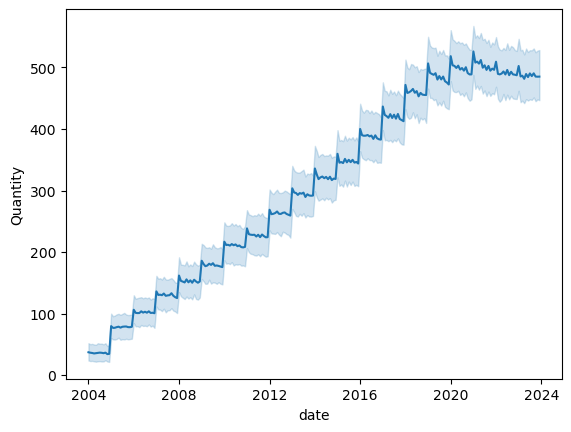

In [8]:
sns.lineplot(data=df, x='date', y='Quantity')

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OrdinalEncoder

In [10]:
df = df.drop(columns=["Month"])

In [11]:
X = df.drop(columns=["Quantity"])

In [12]:
X[['Country']] = OrdinalEncoder().fit_transform(X[['Country']])

In [13]:
X

,Country,Product,date
0,6.0,MorningMint,2004-01-01
1,6.0,MorningMint,2004-02-01
2,6.0,MorningMint,2004-03-01
3,6.0,MorningMint,2004-04-01
4,6.0,MorningMint,2004-05-01
...,...,...,...
239995,7.0,HydratingHoney Pet Wipes,2023-08-01
239996,7.0,HydratingHoney Pet Wipes,2023-09-01
239997,7.0,HydratingHoney Pet Wipes,2023-10-01
239998,7.0,HydratingHoney Pet Wipes,2023-11-01


In [14]:
X[['Product']] = OrdinalEncoder().fit_transform(X[['Product']])

In [15]:
X['Year'] = X['date'].dt.year
X['Month'] = X['date'].dt.month

In [16]:
X

,Country,Product,date,Year,Month
0,6.0,53.0,2004-01-01,2004,1
1,6.0,53.0,2004-02-01,2004,2
2,6.0,53.0,2004-03-01,2004,3
3,6.0,53.0,2004-04-01,2004,4
4,6.0,53.0,2004-05-01,2004,5
...,...,...,...,...,...
239995,7.0,47.0,2023-08-01,2023,8
239996,7.0,47.0,2023-09-01,2023,9
239997,7.0,47.0,2023-10-01,2023,10
239998,7.0,47.0,2023-11-01,2023,11


In [17]:
X = X.drop(columns='date')

In [18]:
y = df['Quantity']

In [19]:
DT = DecisionTreeRegressor().fit(X, y)

In [20]:
y_hat = DT.predict(X)

In [21]:
from sklearn.metrics import r2_score

In [22]:
r2_score(y, y_hat)

1.0

In [23]:
df = pd.read_csv("../data/01_input_history.csv")

In [24]:
def preprocess_dataset(df_old):
    """
    INPUT:
        - original dataset
        
    RETURNS:
        - processed dataset
        - ordinal encoder of country
        - ordinal encoder of product
    """
    df = df_old.copy()


    df['date'] = pd.to_datetime(df['Month'], format='%b%Y')
    df['Year'] = df['date'].dt.year
    df['Month'] = df['date'].dt.month

    df['Month'] = np.sin(df['Month'])
    df['Year'] = np.sin(df['Year'])

    product_encoder = OrdinalEncoder().fit(df[['Product']])
    country_encoder = OrdinalEncoder().fit(df[['Country']])

    df[['Product']] = product_encoder.transform(df[['Product']])
    df[['Country']] = country_encoder.transform(df[['Country']])
    
    df = df.drop(columns=['date'])
    

    return df, product_encoder, country_encoder


In [25]:
df_preprocessed, product_encoder, country_encoder = preprocess_dataset(df)

In [26]:
df_preprocessed = df_preprocessed[df_preprocessed['Quantity'] > 0]

In [27]:
X = df_preprocessed.drop(columns='Quantity')
y = df_preprocessed['Quantity']

In [28]:
from sklearn.model_selection import TimeSeriesSplit

In [29]:
X

,Country,Product,Month,Year
168,6.0,53.0,0.841471,0.890078
169,6.0,53.0,0.909297,0.890078
170,6.0,53.0,0.141120,0.890078
171,6.0,53.0,-0.756802,0.890078
172,6.0,53.0,-0.958924,0.890078
...,...,...,...,...
239755,7.0,13.0,0.989358,-0.184604
239756,7.0,13.0,0.412118,-0.184604
239757,7.0,13.0,-0.544021,-0.184604
239758,7.0,13.0,-0.999990,-0.184604


In [30]:
splitter = TimeSeriesSplit(10)

In [31]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

In [32]:
from xgboost import XGBRegressor


In [33]:
from sklearn.metrics import mean_squared_error

<Axes: xlabel='Quantity', ylabel='Count'>

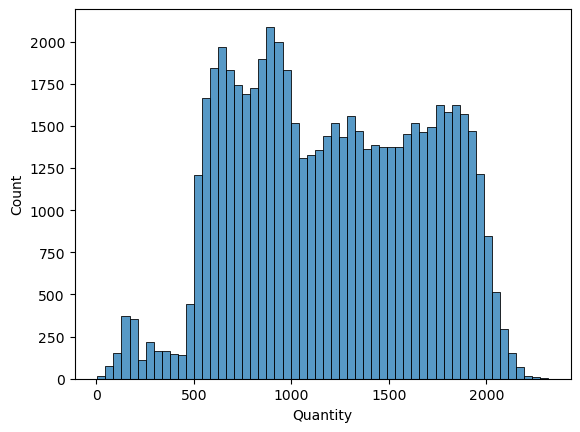

In [34]:
sns.histplot(y)

In [35]:
X

,Country,Product,Month,Year
168,6.0,53.0,0.841471,0.890078
169,6.0,53.0,0.909297,0.890078
170,6.0,53.0,0.141120,0.890078
171,6.0,53.0,-0.756802,0.890078
172,6.0,53.0,-0.958924,0.890078
...,...,...,...,...
239755,7.0,13.0,0.989358,-0.184604
239756,7.0,13.0,0.412118,-0.184604
239757,7.0,13.0,-0.544021,-0.184604
239758,7.0,13.0,-0.999990,-0.184604


In [36]:
from sklearn.dummy import DummyRegressor

In [37]:
r2_scores = []
for train_idx, test_idx in splitter.split(X, y):
    X_train = X.iloc[train_idx]
    X_test = X.iloc[test_idx]

    y_train = y.iloc[train_idx]
    y_test = y.iloc[test_idx]

    DT = DecisionTreeRegressor().fit(X_train, y_train)

    y_hat_test = DT.predict(X_test)
    r2_scores.append(score_i := r2_score(y_test, y_hat_test))
    print(score_i)


-0.9896542808954218
-0.9304333963985378
-1.0293119333832337
-1.043181021252631
-1.353072744892581
-1.570318422261995
-1.0651998702030658
-1.0868447918796824
-1.0076099056883048
-1.904641470825167


In [38]:
r2_scores

[-0.9896542808954218,
 -0.9304333963985378,
 -1.0293119333832337,
 -1.043181021252631,
 -1.353072744892581,
 -1.570318422261995,
 -1.0651998702030658,
 -1.0868447918796824,
 -1.0076099056883048,
 -1.904641470825167]

In [39]:
X_train

,Country,Product,Month,Year
168,6.0,53.0,0.841471,0.890078
169,6.0,53.0,0.909297,0.890078
170,6.0,53.0,0.141120,0.890078
171,6.0,53.0,-0.756802,0.890078
172,6.0,53.0,-0.958924,0.890078
...,...,...,...,...
221482,7.0,86.0,-0.999990,0.044062
221483,7.0,86.0,-0.536573,0.044062
221484,7.0,86.0,0.841471,-0.816847
221485,7.0,86.0,0.909297,-0.816847


In [40]:
#

In [41]:
df_test = pd.read_csv("../data/01_output_prediction_example.csv")

In [42]:
df_test.drop(columns=['Quantity'], inplace=True)

In [43]:
df_test_preprocessed, _, __ = preprocess_dataset(df_test)

In [44]:
df_test_preprocessed

,Country,Product,Month,Year
0,6.0,53.0,0.841471,0.727267
1,6.0,53.0,0.909297,0.727267
2,6.0,53.0,0.141120,0.727267
3,6.0,53.0,-0.756802,0.727267
4,6.0,53.0,-0.958924,0.727267
...,...,...,...,...
11995,7.0,47.0,0.989358,0.727267
11996,7.0,47.0,0.412118,0.727267
11997,7.0,47.0,-0.544021,0.727267
11998,7.0,47.0,-0.999990,0.727267


In [45]:
from sklearn.kernel_ridge import KernelRidge

In [46]:
from sklearn.ensemble import StackingRegressor

In [54]:
from tensorflow.keras.layers import Dense 
from tensorflow.keras.models import Sequential

ModuleNotFoundError: No module named 'tensorflow'

In [55]:
! pip install tensorflow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
    --------------------------------------- 7.1/376.0 MB 36.4 MB/s eta 0:00:11
   - -------------------------------------- 14.9/376.0 MB 36.2 MB/s eta 0:00:10
   -- ------------------------------------- 23.1/376.0 MB 37.4 MB/s eta 0:00:10
   --- ------------------------------------ 31.7/376.0 MB 38.0 MB/s eta 0:00:10
   ---- ----------------------------------- 40.4/376.0 MB 38.3 MB/s eta 0:00:09
   ----- ---------------------------------- 49.3/376.0 MB 39.2 MB/s eta 0:00:09
   ------ --------------------------------- 59.8/376.0 MB 40.5 MB/s eta 0:00:08
   ------- -------------------------------- 70.5/376.0 MB 41.6 MB/s eta 0:00:08
   -------- ------------------------------- 81.0/376.0 MB 42.7 MB/s eta 0:00:07
   --------- ------------------------------ 92.0/376.0 MB 43.2 MB/s eta 0:00:07
   ---------- ---------------------------- 100.9/376.0 MB 43.2 MB/s eta 0:00:07
   ----------- --------------------------- 108.8/3

In [51]:
DT = StackingRegressor(
    estimators = [
        ('dt', DecisionTreeRegressor()), 
        ('rf',RandomForestRegressor()), 
        ('lr', LinearRegression())
    ],
    final_estimator = XGBRegressor()
    
).fit(X, y)

In [52]:
df_test['Quantity'] = DT.predict(df_test_preprocessed).astype('int')

In [53]:
df_test.to_csv('../data/01_monster2.csv', index=False)